<a href="https://colab.research.google.com/github/dsnnaveen/Credit-Card-Fraud-Deteciton/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Improting the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,roc_auc_score,roc_curve,auc
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the Data 

In [3]:
!pip install xlrd

In [4]:

!pip install --upgrade pandas
import pandas as pd


In [5]:
# the pd.read_excel file ask newer version of xlrd or pandas version 1.2.0
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 2.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [6]:
print(pd.__version__)


1.3.5


In [7]:
credit_df=pd.read_excel('/content/drive/MyDrive/AB Capstone Projects data files/CLASSIFICATION/default of credit card clients.xls',header = 1)

Understand the data

In [8]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
credit_df.shape


(30000, 25)

 Description of columns from dataset documentation

There are 25 variables:

• ID: ID of each client

• LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

• SEX: Gender (1=male, 2=female)

• EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

• MARRIAGE: Marital status (1=married, 2=single, 3=others)

• AGE: Age in years

• PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

• PAY_2: Repayment status in August, 2005 (scale same as above)

• PAY_3: Repayment status in July, 2005 (scale same as above)

• PAY_4: Repayment status in June, 2005 (scale same as above)

• PAY_5: Repayment status in May, 2005 (scale same as above)

• PAY_6: Repayment status in April, 2005 (scale same as above)

• BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

• BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

• BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

• BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

• BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

• BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

• PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

• PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

• PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

• PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

• PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

• PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

• default.payment.next.month: Default payment (1=yes, 0=no)

In [10]:
credit_df.shape

(30000, 25)

Understand the data by printing out all column names

In [11]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Data Cleaning

In [12]:
credit_df.drop('ID',axis=1,inplace=True)

Check missing values, column type and column names

In [13]:
# that this statement converts the dataframe columns to integer values, but was not able to understand the usage
#  of the lambda function or the errors='coerce' part.
credit_df = credit_df.apply(lambda x : pd.to_numeric(x))
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [14]:
credit_df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There is no missing value, all columns have the correct type

In [16]:
credit_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


ploting the features

In [17]:
var=[]
for i,col in enumerate(credit_df.columns):
 var.append(credit_df[col].value_counts().shape[0])
num_cat_sep=pd.DataFrame({'columns':credit_df.columns,'Unique_counts':var})
categorical_variable=num_cat_sep[num_cat_sep['Unique_counts']<15]['columns']
numerical_variables=num_cat_sep[num_cat_sep['Unique_counts']>15]['columns']

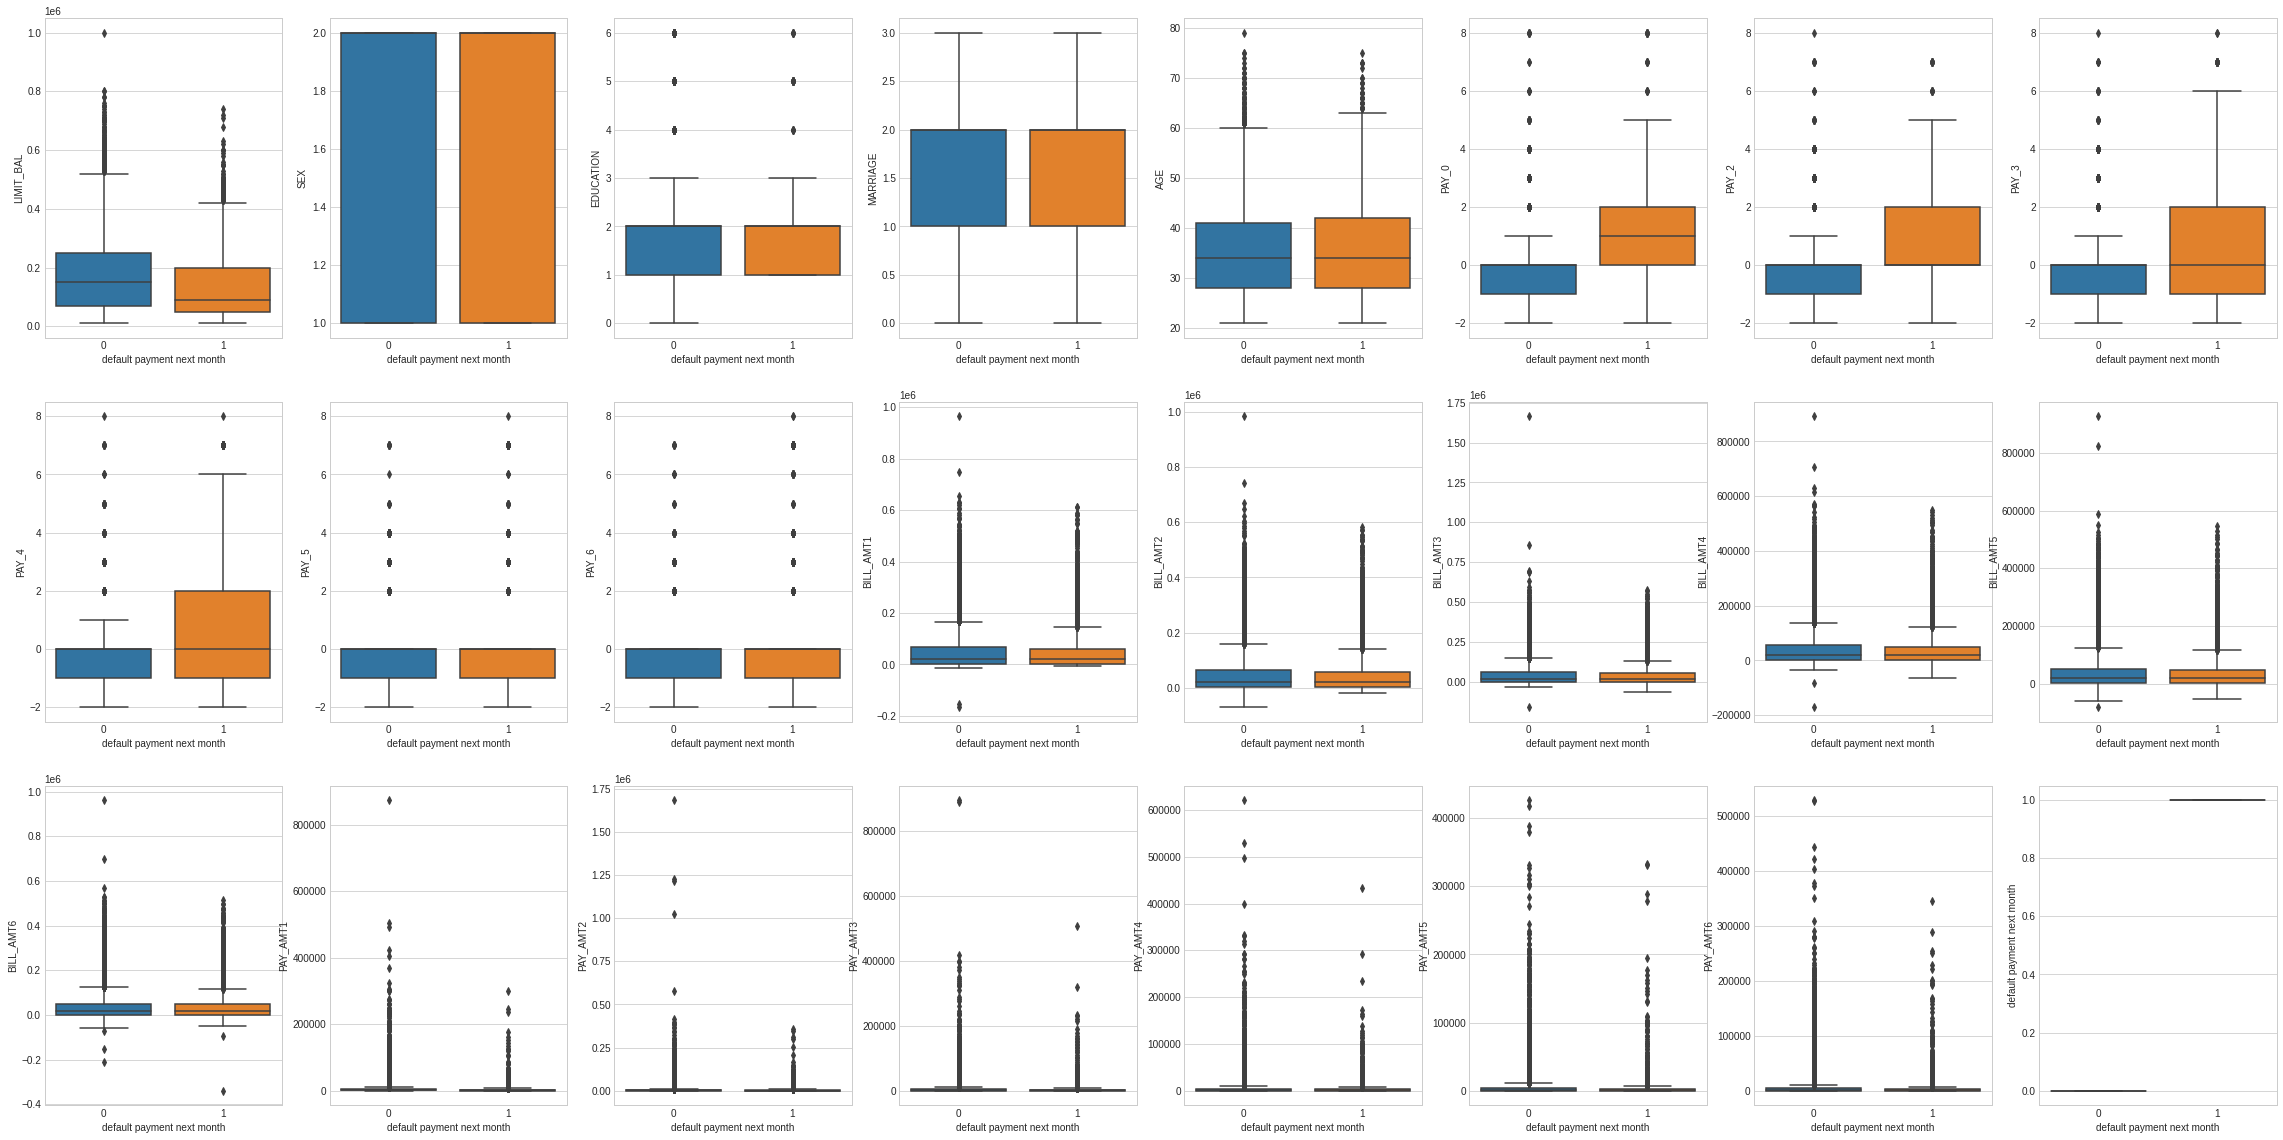

In [18]:
plt.figure(figsize=[40,20])
for i,col in enumerate(credit_df.columns):
 plt.subplot(3,8,i+1)
 sns.boxplot(data=credit_df,y=col,x='default payment next month')
plt.show()

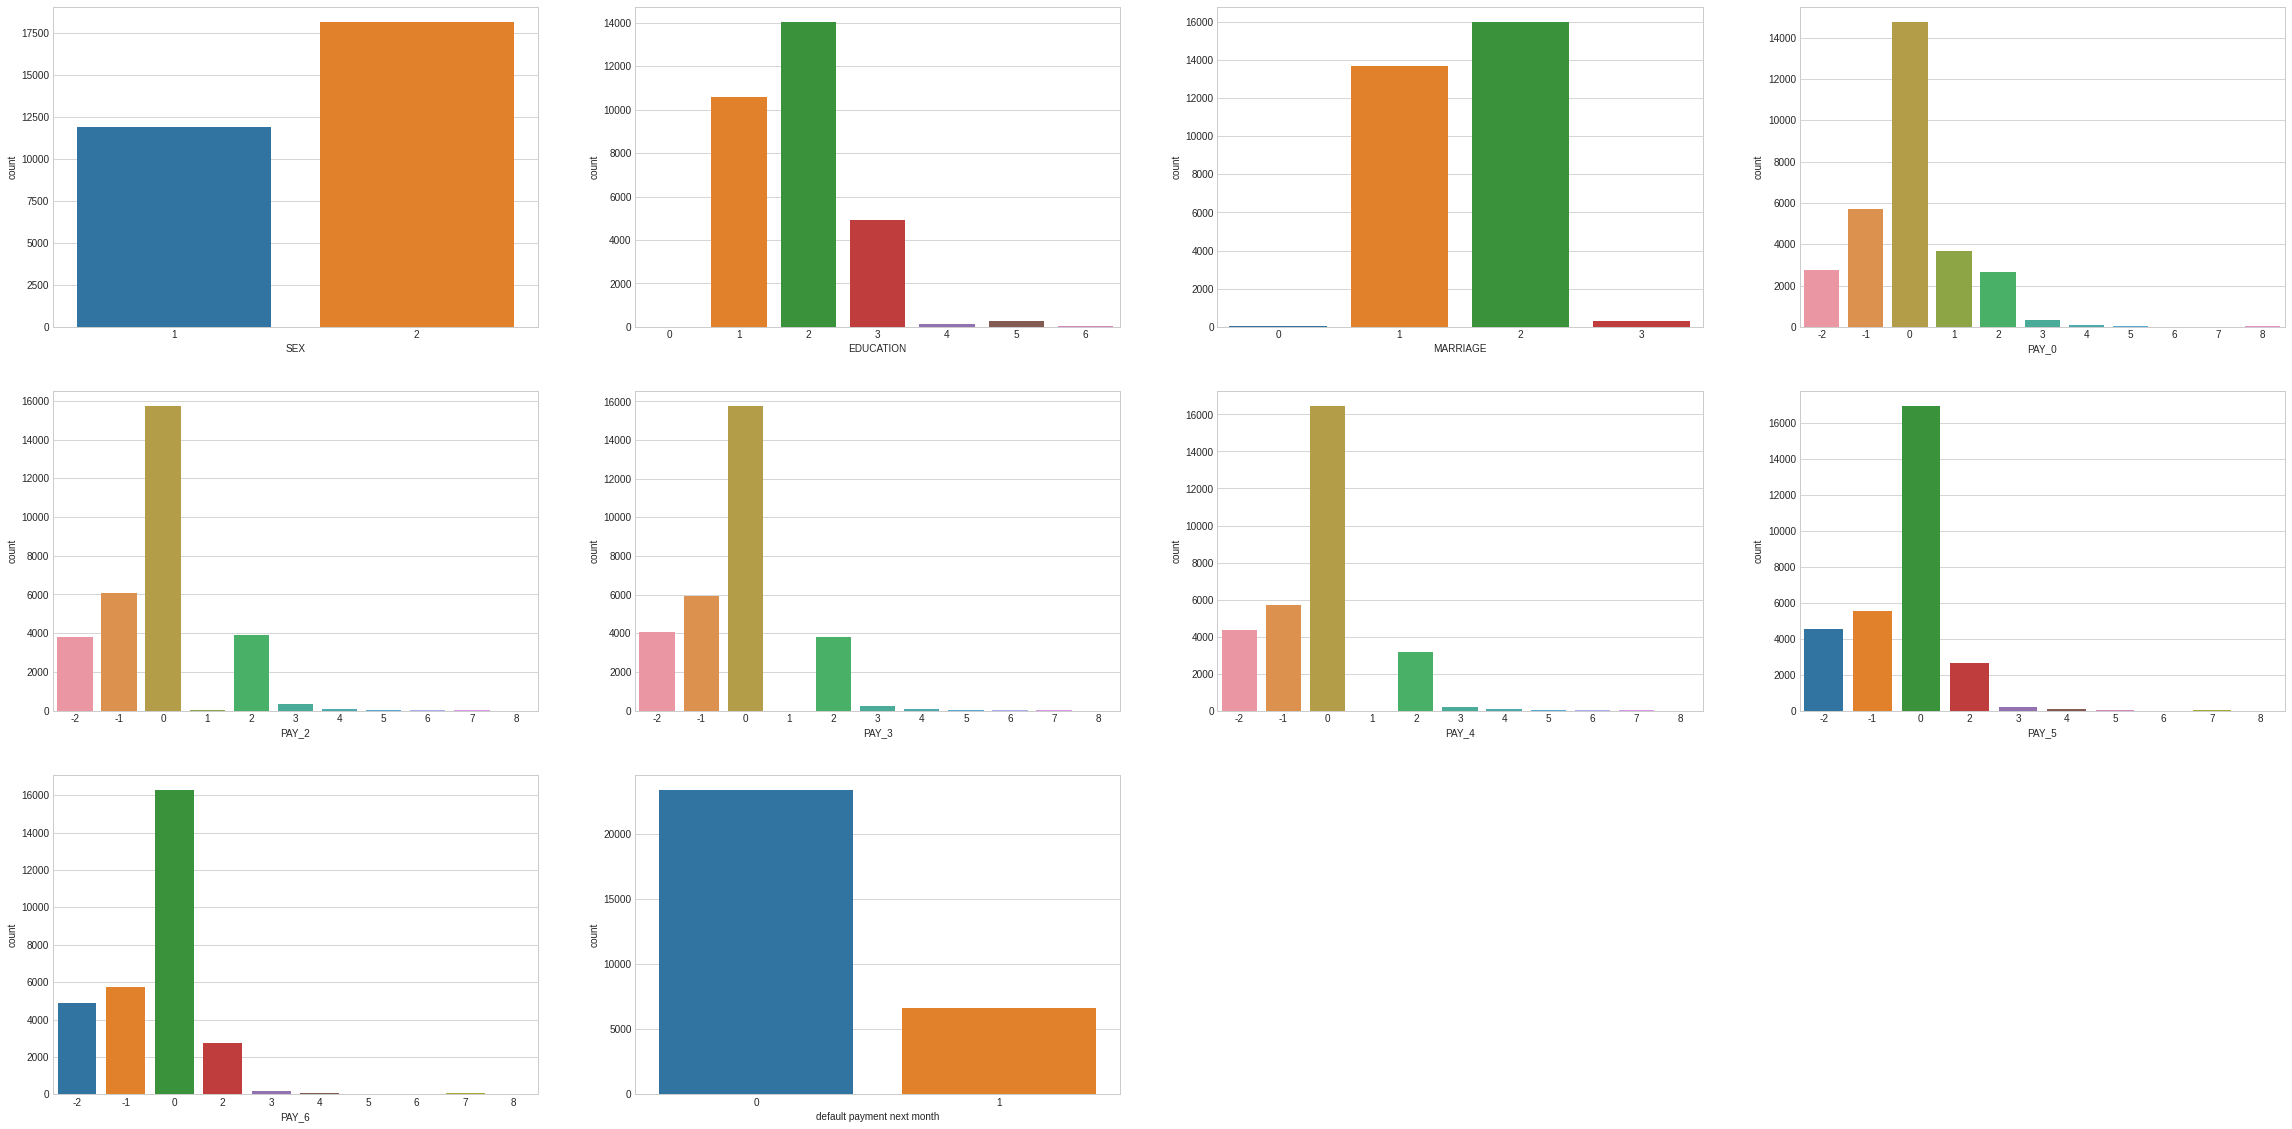

In [19]:
plt.figure(figsize=[40,20])
for i,col in enumerate(categorical_variable):
 plt.subplot(3,4,i+1)
 sns.countplot(x=col,data=credit_df)
plt.show()

ploting and understanding the categorical features

In [20]:

categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [21]:
credit_df_cat = credit_df[categorical_features]
credit_df_cat['Defaulter'] =credit_df['default payment next month']

In [22]:
credit_df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)


<Figure size 720x360 with 0 Axes>

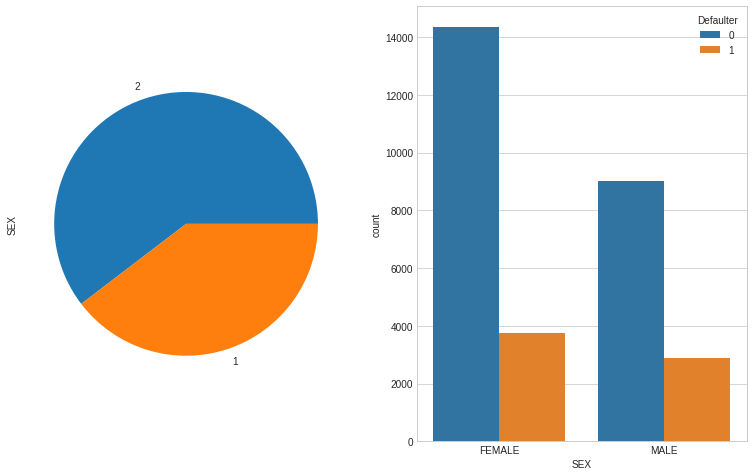

<Figure size 720x360 with 0 Axes>

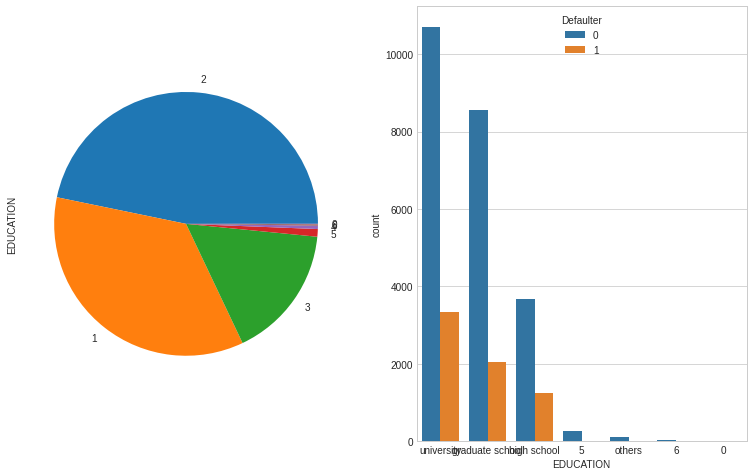

<Figure size 720x360 with 0 Axes>

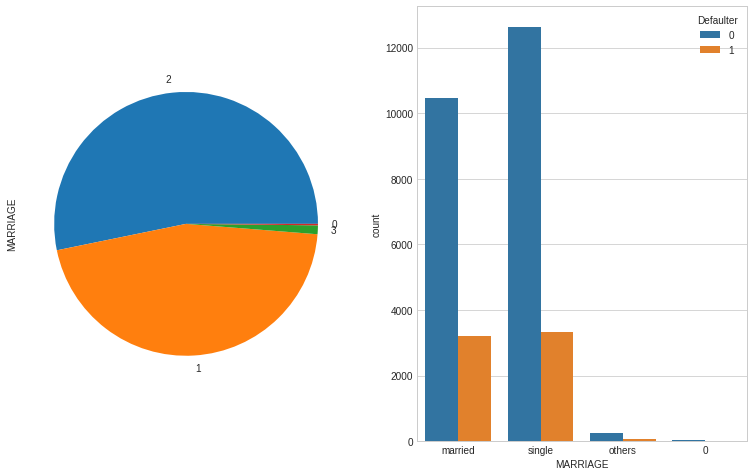

In [23]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  credit_df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = credit_df_cat)


Below are few observations for categorical features:

There are more females credit card holder,so no. of defaulter have high proportion of females.

No. of defaulters have a higher proportion of educated people (graduate school and university)

No. of defaulters have a higher proportion of Singles.

In [24]:
credit_df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [25]:
credit_df['AGE']=credit_df['AGE'].astype('int')

visualising the bill amount